In [1]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.test.csv')
# df = pd.read_csv('../transformer/pfam_tiny_1579.train.csv')
# df = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.train.csv')
# df = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.valid.csv')
df

,seq,label
0,AFLFSGRREVMADACLQGMMGCVYGTAGGMDSAAAVLGDFCFLAGK...,PF12746.7
1,MVDVGGKPVSRRTAAASATVLLGEKAFWLVKENQLAKGDALAVAQI...,PF01967.21
2,VLDVACGTCDVAMEARNQTGDAAFIIGTDFSPGMLTLGLQKLKKNR...,PF13649.6
3,VVLERASLESVKVGKEYQLLNCDRHKGIAKKFKRDISTCRPDITHQ...,PF03587.14
4,GAVRVDVSGGLGTDAMVVSSYLNTDKSLVTVIVNADNQDRDISLAI...,PF17189.4
...,...,...
126166,VPEVLGARGYAADTDIVLDVTDPLGLAGGRFQLQTRDGAGKCTPHD...,PF13530.6
126167,VTGLEILRKARAEGYGVGAFNTNNMEFTQAILEAAEEMKSPVILAL...,PF01116.20
126168,KQVAKDRLKVILIHDRGELSDEVLDKIRLEILDVLSKYVEIENEDV...,PF03776.14
126169,AFLRCWSSYRTKAWMSDELEPVNGGRKDTFGGWGATLVDSLDTLWI...,PF01532.20


<Axes: xlabel='count', ylabel='Count'>

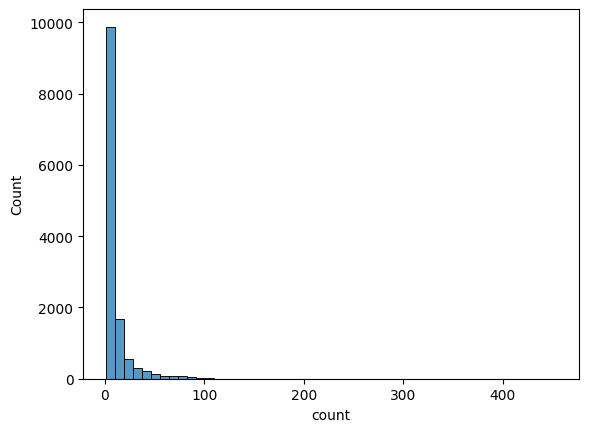

In [12]:
sns.histplot(df['label'].value_counts(), bins=50)

In [3]:
colnames = ['id', 'len', 'seq', 'labels']
df = pd.read_table('../chunk500k.txt', header=None, sep=' ', names=list(range(7)))
df

ParserError: Error tokenizing data. C error: Expected 5 fields in line 22, saw 6


In [52]:
import os
os.path.join("sdfgsdg", "stored_embeddings")

'sdfgsdg/stored_embeddings'

In [6]:
import csv
path = "../chunk500k.txt"
with open(path) as file:
    reader = csv.reader(file, delimiter=" ")
    samples = list(reader)

In [27]:
# samples = [sample for sample in samples if len(sample[3:]) == 1]
from collections import Counter
samples = [sample for sample in samples if int(sample[1]) < 3000]
cnt = Counter(list(itertools.chain.from_iterable([s[3:] for s in samples])))
taken = [k for k, v in cnt.items() if v > 100]

In [37]:
len(cnt)


14513

In [17]:
# train test split
import math
n = len(samples)

split_point = math.ceil(n * 0.75)
train = samples[:split_point]
test = samples[split_point:]
print(len(train))
print(len(test))

375000
124999


In [18]:
import itertools
train_fams = set(list(itertools.chain.from_iterable([s[3:] for s in train])))
test_fams = set(list(itertools.chain.from_iterable([s[3:] for s in test])))

In [21]:
len(test_fams)

10438

In [7]:
import itertools
l = [[1,2,4,5,6],[4,5]]
h = itertools.chain.from_iterable(l)

In [30]:
from collections import Counter
from itertools import chain
flat = chain.from_iterable(samples)
cnt = Counter(list(itertools.chain.from_iterable([s[3:] for s in samples])))
cnt


Counter({'PF00115': 4561,
         'PF07690': 4488,
         'PF00069': 3905,
         'PF00005': 3427,
         'PF00528': 2636,
         'PF00067': 2481,
         'PF00106': 2239,
         'PF07714': 2239,
         'PF13561': 2083,
         'PF00400': 1722,
         'PF00583': 1533,
         'PF00171': 1512,
         'PF00561': 1450,
         'PF00076': 1436,
         'PF00078': 1243,
         'PF00155': 1190,
         'PF00892': 1172,
         'PF00440': 1159,
         'PF00384': 1089,
         'PF00083': 1053,
         'PF00378': 1001,
         'PF00603': 974,
         'PF00248': 970,
         'PF01370': 956,
         'PF00903': 944,
         'PF00188': 897,
         'PF00509': 891,
         'PF00149': 859,
         'PF00293': 849,
         'PF02653': 833,
         'PF00535': 823,
         'PF00064': 805,
         'PF00201': 785,
         'PF12697': 758,
         'PF00071': 727,
         'PF00153': 726,
         'PF03372': 687,
         'PF13639': 667,
         'PF05424': 665,
    

In [34]:
taken = [k for k, v in cnt.items() if 1000 < v < 2000]

In [38]:
taken = set(taken)

In [40]:
# filter for familises
seqs = [sample for sample in samples if sample[3:][0] in taken]

In [49]:
# filter for seq lens
seqs = [seq for seq in seqs if int(seq[1]) < 2000]

In [51]:
with open('filtered_seqs.txt', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(seqs)

<Axes: ylabel='Count'>

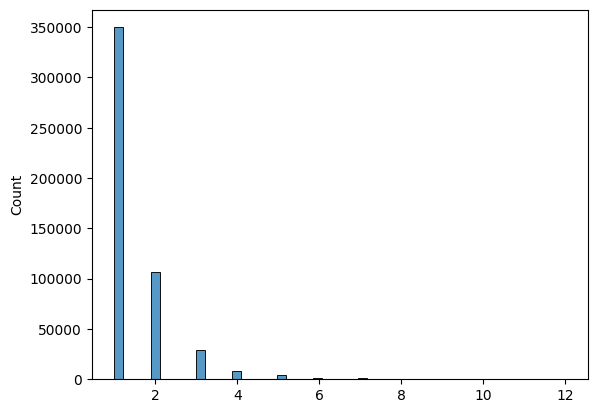

In [12]:
sns.histplot([len(sample) for sample in samples], bins=50)

In [3]:
from itertools import chain
flat = chain.from_iterable(samples)
all_families = set()
for fam in flat:
    all_families.add(fam)

In [4]:
print("there is a total of", len(all_families), "families")

there is a total of 14513 families


In [5]:
flat = chain.from_iterable(samples)
all_fams = list(flat)

In [7]:
all_fams[:10]

['PF00005',
 'PF00664',
 'PF00005',
 'PF00664',
 'PF01370',
 'PF00733',
 'PF13522',
 'PF00733',
 'PF02310',
 'PF04055']

<Axes: ylabel='Count'>

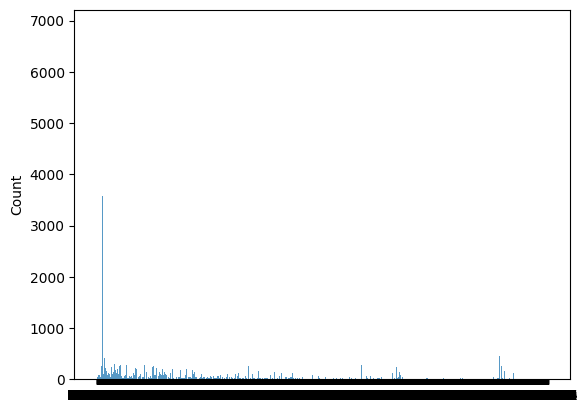

In [25]:
# frequency of protein families 
sns.histplot(all_fams)

In [8]:
from collections import Counter
cnt = Counter(all_fams)

In [18]:
counts = cnt.values()
counts = list(counts)
counts = [cnt for cnt in counts if cnt < 600]

<Axes: ylabel='Count'>

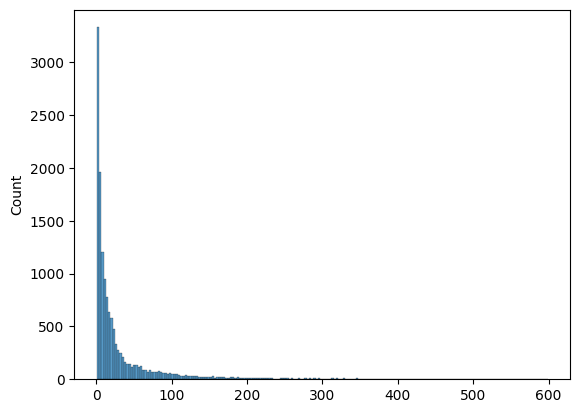

In [19]:
import seaborn as sns
sns.histplot(data=counts, bins=200)

In [43]:
print("Families appearing only once", counts.count(1))

Families appearing only once 1391


<Axes: >

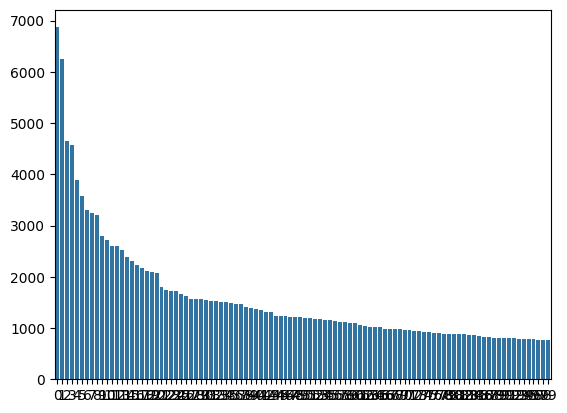

In [57]:
import numpy as np
y = list(cnt.values())
y = sorted(y, reverse=True)
sns.barplot(x=np.arange(100), y=y[:100])

In [23]:
cntsw = np.load('cntsw.npy')

<Axes: ylabel='Count'>

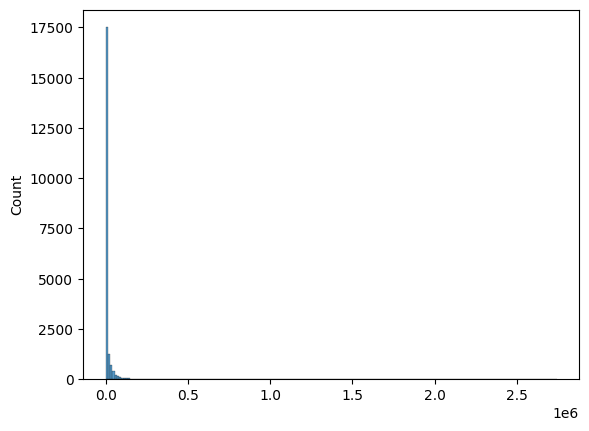

In [25]:
sns.histplot(data=cntsw, bins=200)

In [42]:
len(cntsw[cntsw < 100])

2119

<Axes: ylabel='Count'>

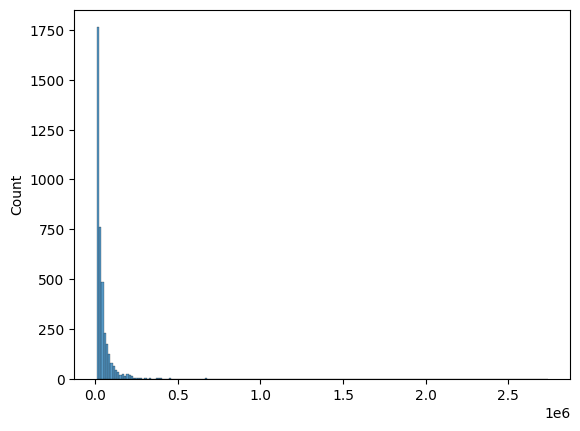

In [45]:
a = [e for e in cntsw if e > 10000]
sns.histplot(data=a, bins=200)

In [7]:
import os
os.getcwd()

'/home/nikola_dev/Metagenome-AI/framework'

In [2]:
from sklearn.manifold import TSNE
import pandas as  pd
import csv
import pickle

path_emb = "../embeddings_tsne/stored_embeddings"
path = "filtered_seqs.txt"
embeddings = []
fam = []
with open(path) as f:
    reader = csv.reader(f, delimiter=" ")
    for row in reader:
        prot_id = row[0]
        pfam = row[3]
        with open(f"{path_emb}/{prot_id}.pkl", "rb") as file_emb:
            prot_emb = pickle.load(file_emb)
            embeddings.append(prot_emb['cls'])
            fam.append(pfam)

In [3]:
import numpy as np

X = np.array(embeddings)
X_emb = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(X)

In [4]:
import seaborn as sns
import pandas as pd

tsne_result_df = pd.DataFrame({'tsne_1': X_emb[:,0], 'tsne_2': X_emb[:,1], 'pfam':fam})

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

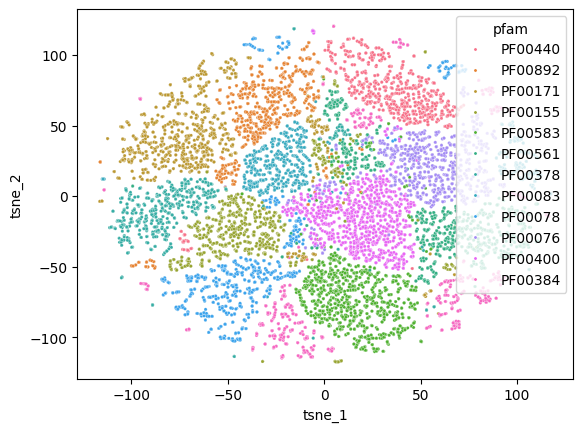

In [5]:
sns.scatterplot(x='tsne_1', y='tsne_2', hue='pfam', data=tsne_result_df,s=5)

In [59]:
# UMAP
import umap

reducer = umap.UMAP()
umap_emb = reducer.fit_transform(X)

<Axes: xlabel='umap_1', ylabel='umap_2'>

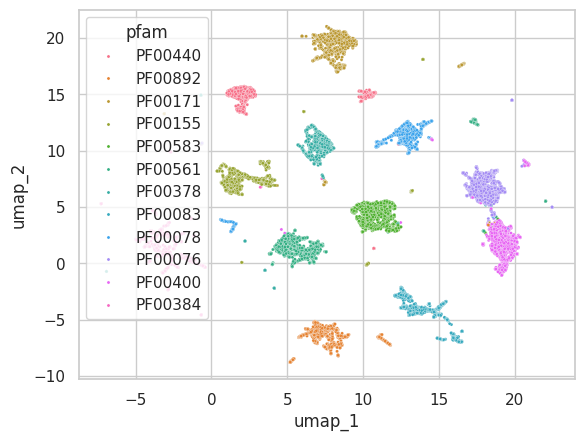

In [60]:
umap_result_df = pd.DataFrame({'umap_1': umap_emb[:,0], 'umap_2': umap_emb[:,1], 'pfam':fam})
sns.scatterplot(x='umap_1', y='umap_2', hue='pfam', data=umap_result_df,s=5)

In [1]:
import scanpy as sc

In [2]:
adata = sc.read('/goofys/Samples/sc_reference/mouse_brain_L5.h5ad')
adata

/home/nikola_dev/miniconda3/envs/ssi/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikola_dev/miniconda3/envs/ssi/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'cell_subclass', 'cell_class'

In [4]:
adata.obs['cell_subclass']

10X82_2_TCTCTCACCAGTTA-     ENT9
10X82_2_TATTATCTACCAGA-     ENT9
10X82_2_TATCCCAGATGGCA-     ENT9
10X82_2_ATTACGTATGAATG-     ENT9
10X82_2_ATACGTCAATAAGG-     ENT9
                           ...  
10X43_2_TACAACAGTCGT-      PSNP6
10X43_2_ATGATGGGTTAC-      PSNP6
10X43_2_GCAGCTTAGAGA-      PSNP6
10X53_7_GCGATGGGAGGT-      PSNP6
10X43_2_TTAATGGGGCAA-      PSNP6
Name: cell_subclass, Length: 160796, dtype: category
Categories (265, object): ['ABC', 'ACBG', 'ACMB', 'ACNT1', ..., 'VECV', 'VLMC1', 'VLMC2', 'VSMCA']

In [2]:
import csv
file = open("/goofys/projects/MAI/data/AMP_dataset/AMP_dataset_train.csv")
reader = csv.reader(file, delimiter=" ")
train_data = list(reader)

In [32]:

whole = open("/goofys/projects/MAI/data/AMP_dataset/AMP_dataset.csv")
reader = csv.reader(whole, delimiter=" ")
whole_data = list(reader)

In [18]:
henan = open("/home/nikola_dev/Metagenome-AI/AMPs_activity_validated_by_Henan.tsv")
reader = csv.reader(henan, delimiter="\t")
henan_data = list(reader)
henan_data[1]

['HENAN_2', '28', 'RPCFYGPGRAGLCFWSWCLAIGRRGFVK', '0']

In [17]:
valid = open("/home/nikola_dev/Metagenome-AI/validated_AMP_extinction.tsv")
reader = csv.reader(valid, delimiter="\t")
valid = list(reader)
valid[1]

['EXTIN_1', '14', 'WFHFNSKILLLTGL', '1']

In [22]:
valid_set = set([val[2] for val in valid])
henan_set = set([hen[2] for hen in henan_data])
train_set = set([t[2] for t in train_data])


In [33]:
whole_set = set([val[2] for val in whole_data])

In [34]:
len(whole_set)

86586

In [30]:
print(len(valid_set & henan_set))
print(len(train_set & henan_set))
print(len(train_set & valid_set))

0
3
0


In [35]:
print(len(whole_set & valid_set))
print(len(whole_set & henan_set))

0
3


In [31]:
train_set & henan_set

{'GVPMGSVIKKRRKRMAKKKHRKLLRKTRHQRRNKK',
 'KKRKGHKMATHKRKKRLRKNRHKKK',
 'KQKTLKKVWKLSEKVLIFASAFAKKAGAAEATLVL'}

In [2]:
import csv
file = open("/goofys/projects/MAI/data/AMP_dataset/AMP_dataset_train.csv")
reader = csv.reader(file, delimiter=" ")
data = list(reader)
data[0]


['2881242', '39', 'MKSKDNDSKIELTQKISVLQPIMNIRLFMKVPFQEIRNQ', '0']

In [7]:
len(data) * 0.1

6929.200000000001

In [26]:
from sklearn.model_selection import train_test_split
X = [d[:3] for d in data]
y = [d[3] for d in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, test_size=4000, stratify=y) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=2000, test_size=2000, stratify=y_test) 


In [30]:
ftrain = open("sample_train.csv", 'a')
ftest = open("sample_test.csv", 'a')
fval = open("sample_validation.csv", 'a')

writer = csv.writer(ftrain, delimiter=" ")
writer.writerows(X_train)
writer = csv.writer(ftest, delimiter=" ")
writer.writerows(X_test)
writer = csv.writer(fval, delimiter=" ")
writer.writerows(X_val)


In [35]:
# [x.append(y) for x, y in zip(X_train, y_train)]
# [x.append(y) for x, y in zip(X_test, y_test)]
# [x.append(y) for x, y in zip(X_val, y_val)]
X_train

[['2868240', '43', 'MTKKLYYTAPDVAAWTTAMTSVRQGGETYVVRMSAIANGGRFL', '0'],
 ['2877836', '40', 'MFCALKNNIHLYTFFEQRIKKFKKVAEQIETCFYVRAFEN', '0'],
 ['DRAMP13827',
  '50',
  'ELCEKASLTWTGNCGNTKHCDTQCRNWEGAKHGACHKRSGKWKCFCYFNC',
  '1'],
 ['2890987', '37', 'MTILTDLLSSGADICESYDGDYENSNNMGCLQIVQFI', '0'],
 ['2869187', '43', 'MPTRRRRFVLGQPRAQRPFSQGCVDLAFADASVEANIGAMPPR', '0'],
 ['DRAMP08177', '12', 'RWWKIWVIRWIR', '1'],
 ['2885340', '38', 'MIPKYHKFGIHSKHLQISKCPVLSCWLIGSNHYFFVGS', '0'],
 ['2880163', '40', 'MNHLPFHFANSIITSQTHQRQSCFPPVDLGYASVYGSIPL', '0'],
 ['2845265', '50', 'MNTMRLGIHSISTCTYYTVLLCVWALQQDEDNLIRSKYILLTIKKASDSW', '0'],
 ['2857663', '46', 'MTLHLVNLITREKSLKIFKLNNPVLRRGSIRKLWQCLRRQRMSITI', '0'],
 ['2855404', '47', 'MMFCGNGCCNIASFAIVISHAVVMWSVNSCTKKLQLETRRCSKCAAM', '0'],
 ['2902206', '31', 'MKEVITVVELDQFKVTLNAYREPLQEVRDSL', '0'],
 ['DBAASPS_12633', '16', 'FIFHIIRFFNFRVFRI', '1'],
 ['DBAASPS_12925', '13', 'AAKAAAKAAAKAA', '1'],
 ['2870348', '42', 'MKPPLRLPFGTDTLKALAEKNAHVTAQTQTWKALSASTDFPA',

In [37]:
fval.close()
ftrain.close()
ftest.close()